In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [ ]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

x_train=x_train.reshape(-1, 32, 32, 3)
x_test=x_test.reshape(-1, 32, 32, 3)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [ ]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(32,32,3), kernel_size=(3,3),
               filters=32, activation='relu', padding='same'))
cnn.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu', padding='same'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(kernel_size=(3,3), filters=128, activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(kernel_size=(3,3), filters=256, activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [ ]:
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)         

In [ ]:
from datetime import datetime

start_time = datetime.now()

hist = cnn.fit(x_train, y_train, batch_size=128, 
               epochs=40, validation_data=(x_test, y_test))

end_time = datetime.now()

print('elapsed time => ', end_time-start_time)

Epoch 1/40
391/391 [==============================] - 6s 14ms/step - loss: 1.9942 - accuracy: 0.2311 - val_loss: 1.5948 - val_accuracy: 0.4083
Epoch 2/40
391/391 [==============================] - 5s 13ms/step - loss: 1.5256 - accuracy: 0.4367 - val_loss: 1.4962 - val_accuracy: 0.4634
Epoch 3/40
391/391 [==============================] - 5s 14ms/step - loss: 1.3103 - accuracy: 0.5323 - val_loss: 1.1473 - val_accuracy: 0.5937
Epoch 4/40
391/391 [==============================] - 5s 14ms/step - loss: 1.1739 - accuracy: 0.5884 - val_loss: 1.0273 - val_accuracy: 0.6310
Epoch 5/40
391/391 [==============================] - 5s 14ms/step - loss: 1.0816 - accuracy: 0.6231 - val_loss: 0.9123 - val_accuracy: 0.6771
Epoch 6/40
391/391 [==============================] - 5s 13ms/step - loss: 1.0183 - accuracy: 0.6474 - val_loss: 0.8600 - val_accuracy: 0.6979
Epoch 7/40
391/391 [==============================] - 5s 13ms/step - loss: 0.9551 - accuracy: 0.6683 - val_loss: 0.8103 - val_accuracy: 0.7169

In [ ]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5518 - accuracy: 0.8179


[0.5518355965614319, 0.8179000020027161]

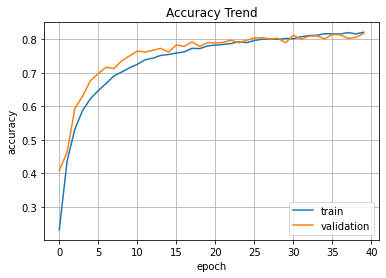

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

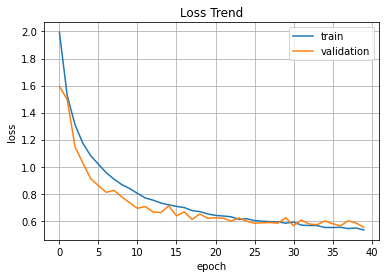

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

In [ ]:
# 모델 저장

try:
    cnn.save('./cifar10_accuracy_82v1.h5')
    print('Done !!!')

except Exception as err:

    print(str(err))

Done !!!
